<a href="https://colab.research.google.com/github/akutayaydin/Sarcopenia-Prediction-ML-Model/blob/main/Sarcopenia_Model_vfinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# The Scope of this project is to find a way(s) to identify Sarcopenia patients?

In [ ]:
# Import Libraries

import numpy as np
import pandas as pd

In [ ]:
# Mount and Access Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# DATA COLLECTION #

In [ ]:
df = pd.read_csv("/content/gdrive/My Drive/Google Colab Folder/Sarcopenia_Project/Sarco_Patients.csv")

In [ ]:
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5016 entries, 0 to 5015
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   0                       5016 non-null   int64  
 1   MMSE                    4115 non-null   float64
 2   Age                     5015 non-null   float64
 3   Weight                  5007 non-null   float64
 4   Height                  5007 non-null   float64
 5   Waist                   4903 non-null   float64
 6   Hip                     4905 non-null   float64
 7   Smoking                 5016 non-null   int64  
 8    Smoking (packet/year)  5014 non-null   float64
 9     Alcohol               5016 non-null   object 
 10  DM                      5014 non-null   float64
 11  DM duration             4929 non-null   float64
 12  İnsülin                 5001 non-null   float64
 13  DM drug                 1461 non-null   object 
 14  Dyslipidemia            5016 non-null   

,0,MMSE,Age,Weight,Height,Waist,Hip,Smoking,Smoking (packet/year),Alcohol,...,Egz,AT,CST,GS,GS.1,Star,BMI,Sarcopenia,Gender,Ad
0,1,29.0,74.0,88.0,178.0,113.0,113.0,1,10.0,social,...,3-4/week,50.2,12.5,1.2,32.0,1.81,27.8,0,M,beyzanur
1,2,30.0,62.0,105.0,172.0,125.0,110.0,1,30.0,social,...,0,49.0,12.1,1.4,47.0,1.38,35.5,1,M,beyzanur
2,3,28.0,65.0,89.0,169.0,110.0,114.0,0,0.0,0,...,3-4/week,37.3,8.7,1.2,33.0,1.20,31.2,0,M,beyzanur
3,4,29.0,71.0,68.0,160.0,103.0,100.0,1,5.0,0,...,1-2/week,29.5,8.3,1.2,25.0,1.11,26.6,0,F,beyzanur
4,5,27.0,61.0,80.0,160.0,102.0,105.0,0,0.0,0,...,1-2/week,39.5,11.0,1.3,31.0,1.26,31.3,0,F,beyzanur


## SECTION 01: EXPLORATORY DATA ANALYSIS

In [ ]:
# DATA PREPROCESSING STARTS HERE

In [ ]:
# Remove not relevant columns
df = df.drop('0', axis =1)
df = df.drop('Ad', axis =1)

# clean up column names that contain whitespace
# df.columns = df.columns.str.replace(" ", "")



# Rename turkish column names and spaces
df = df.rename(columns = {'İnsülin':'Insulin', 'Dyslipidemia duration': 'Dyslipidemia_Duration','DM duration': 'DM_Duration','DM drug': 'DM_Drug','KAH duration': 'KAH_Duration','Dıration of HT': 'HT_Duration', 'HT drugs': 'HT_Drugs','Duration of 1HT':'1HT_Duration','GS.1': 'GS_1','Weight ':'Weight','Height ':'Height','Waist ':'Waist', ' Smoking (packet/year)': 'Smoking_Packets_Per_Year',' Alcohol':'Alcohol','DM ': 'DM','KAH ':'KAH','  Alcohol':'Alcohol'})

In [ ]:
# CONVERT COLUMNS TO NUMERIC DATA TYPES

columns_to_check = [
    'MMSE', 'Age', 'Weight', 'Height', 'Waist', 'Hip', 'Smoking', 'Smoking_Packets_Per_Year',
    'DM', 'DM_Duration', 'Insulin', 'Dyslipidemia', 'Dyslipidemia_Duration', 'KAH',
    'KAH_Duration', 'Hipotiroidi', 'ASTIM', 'KOAH', 'HT', 'HT_Duration', 'N_HT',
    '1HT_Duration', 'AT', 'CST', 'GS', 'GS_1', 'Star', 'BMI','OP'
]

# Convert the values in the specified column to numeric data types
for col in columns_to_check:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [ ]:
df['Egz'] = df['Egz'].replace(' 1-2/week','1-2/week')

In [ ]:
objects_num = df.select_dtypes(include = 'object')
objects_num.columns

Index(['Alcohol', 'DM_Drug', 'Statin', 'OTHERS', 'Type_HT', 'HT_Drugs',
       'Education', 'Job', 'Status', 'Egz', 'Gender'],
      dtype='object')

In [ ]:
objects_num = df.select_dtypes(include = [np.number])
objects_num.columns

Index(['MMSE', 'Age', 'Weight', 'Height', 'Waist', 'Hip', 'Smoking',
       'Smoking_Packets_Per_Year', 'DM', 'DM_Duration', 'Insulin',
       'Dyslipidemia', 'Dyslipidemia_Duration', 'KAH', 'KAH_Duration',
       'Hipotiroidi', 'ASTIM', 'KOAH', 'OP', 'HT', 'HT_Duration', 'N_HT',
       '1HT_Duration', 'AT', 'CST', 'GS', 'GS_1', 'Star', 'BMI', 'Sarcopenia'],
      dtype='object')

In [ ]:
# LOOK FOR OUTLIERS
df.describe().T

# Normalization will be completed as part of the pipeline StandardScaler

,count,mean,std,min,25%,50%,75%,max
MMSE,4115.0,27.620656,2.859489,9.00,27.00,28.00,30.00,30.00
Age,5015.0,61.996810,9.696511,42.00,54.00,62.00,69.00,95.00
Weight,5007.0,76.580188,13.711160,34.00,67.00,76.00,85.00,137.00
Height,5007.0,160.495906,9.034135,125.00,155.00,160.00,166.00,260.00
Waist,4903.0,98.171936,19.209012,0.00,90.00,98.00,106.00,915.00
Hip,4905.0,111.008155,14.486069,0.00,102.00,109.00,117.00,191.00
Smoking,5016.0,0.320375,0.466667,0.00,0.00,0.00,1.00,1.00
Smoking_Packets_Per_Year,5014.0,8.190666,16.073376,0.00,0.00,0.00,10.00,150.00
DM,5014.0,0.304547,0.460261,0.00,0.00,0.00,1.00,1.00
DM_Duration,4929.0,3.123554,6.536226,0.00,0.00,0.00,2.00,40.00


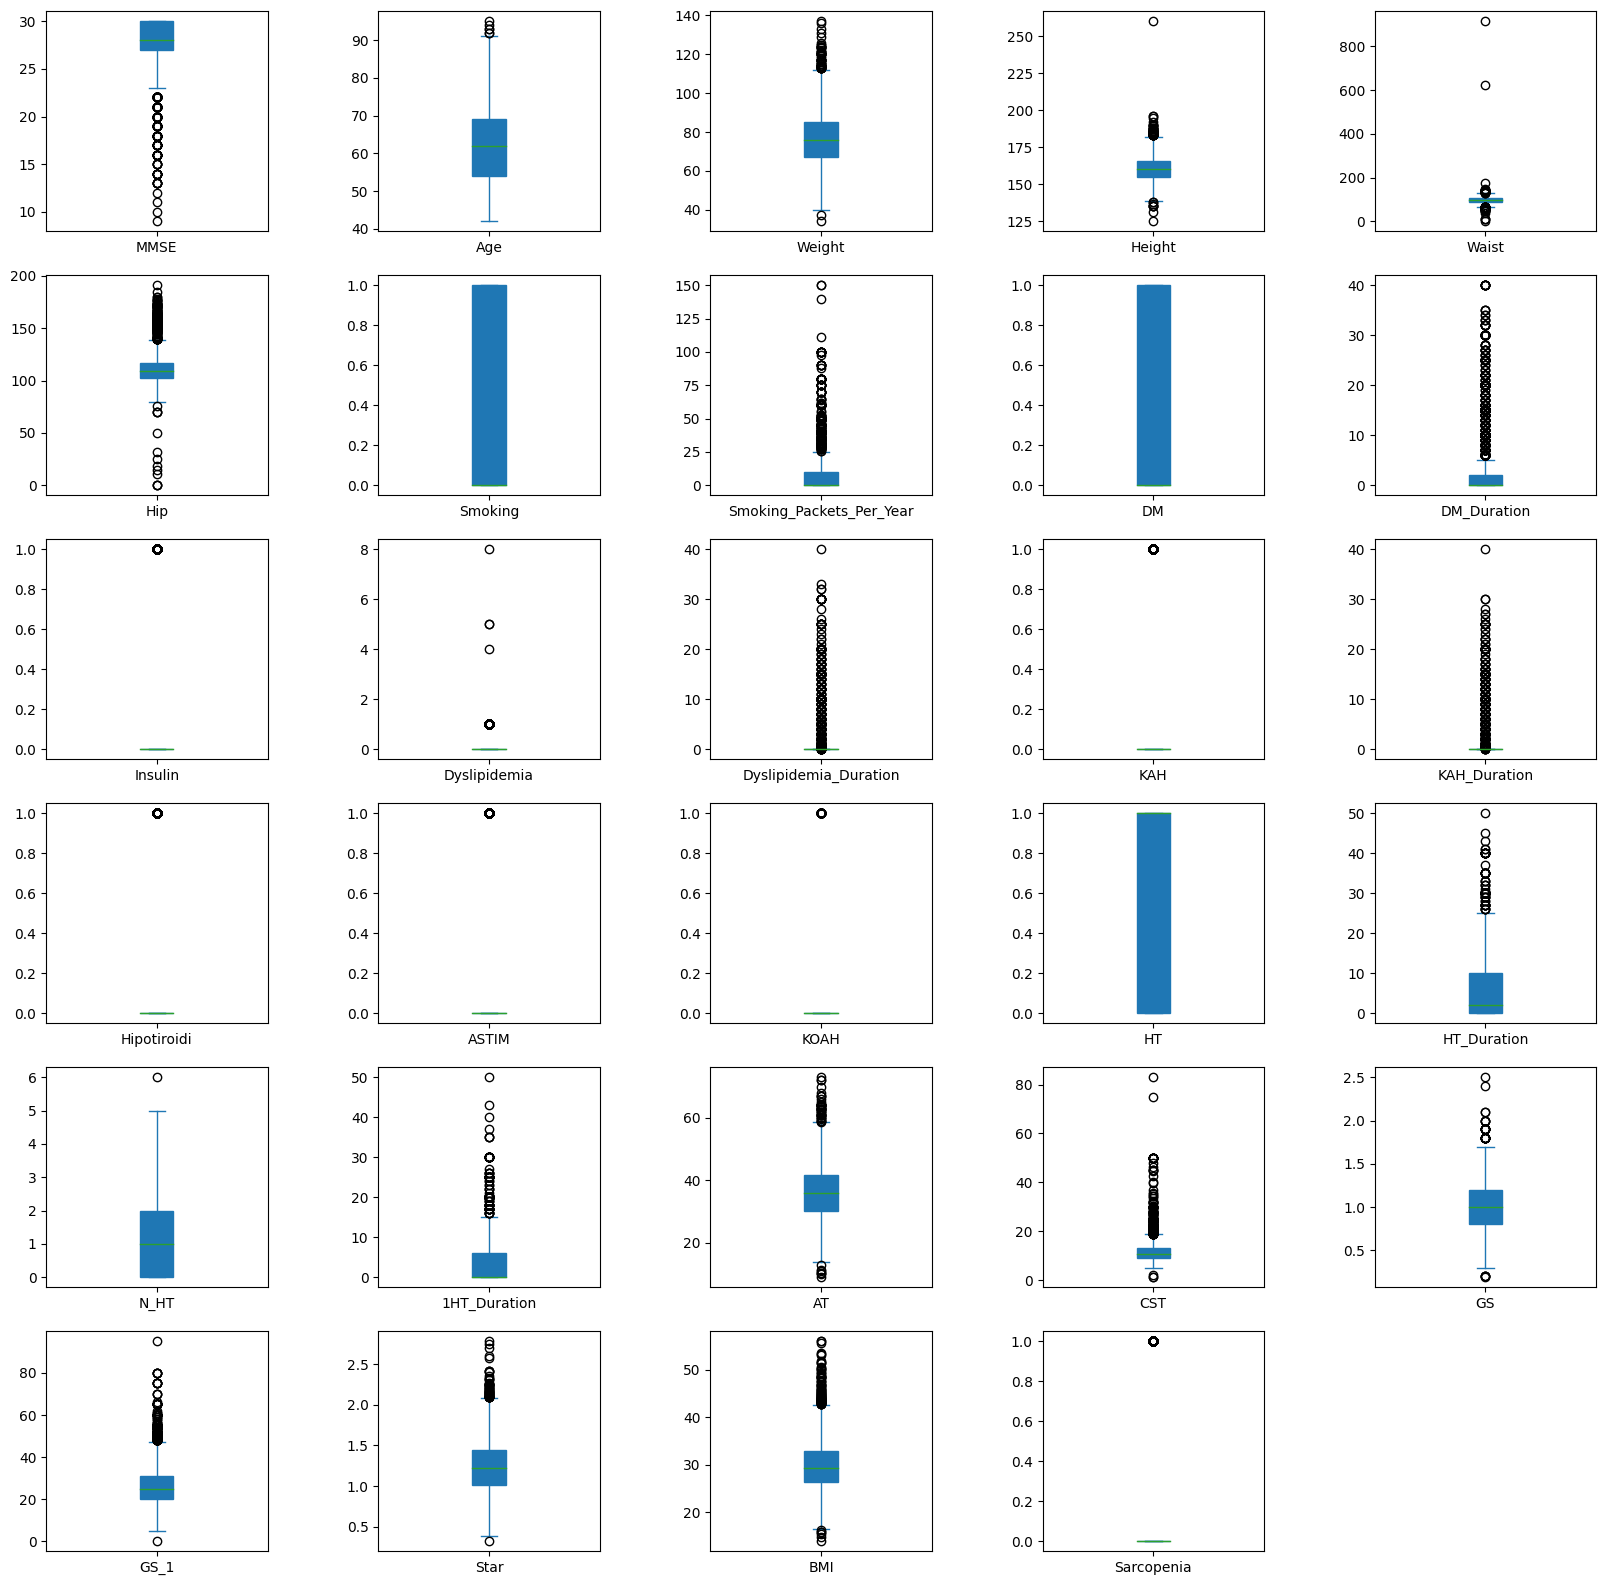

In [ ]:
# Outliers
# Identify features containing outliers:

from matplotlib import pyplot as plt

df_to_plot = df.select_dtypes(include = [np.number])

df_to_plot.plot(subplots = True, kind ='box', layout = (6,5), figsize = (20,20),patch_artist=True)
plt.subplots_adjust(wspace=0.5);

In [ ]:
# HANDLE MISCALCULATED BMI #V2
# Instead of recalculating BMI. I removed BMI values with high differences.

In [ ]:
df ['Height_Meter_Square'] = (df ['Height'] / 100) ** 2
df ['Height_Meter_Square'] = df ['Height_Meter_Square'].round(2)
df ['BMI_Calc'] = df ['Weight'] / df ['Height_Meter_Square']

df = df.drop(columns = 'Height_Meter_Square')
df = df.round(2)

df ['BMI_Diff'] = df ['BMI'] - df ['BMI_Calc']
df ['BMI_Diff'] = df ['BMI_Diff'].abs()

df = df [df ['BMI_Diff'] < 0.5] # Threshold can be changed

In [ ]:
df.shape #5016 (Initial # of Data) >>4916

(4916, 43)

In [ ]:
# FEATURE ENGINEERING #


1.   **'MMSE'**, Mini-Mental State Examination, a test used to assess cognitive impairment and dementia
1.   **'Waist'**, waist circumference
1.   **'Hip'**, hip circumference
1.   **'DM'**, individual has diabetes or not
1.   **'DM_Duration'**, length of time the individual has had diabetes
1.   **'Insulin'**, Is individual taking insulin
1.   **'DM_Drug'**, medications or drugs used to manage diabetes
1.   **'Dyslipidemia'**, cholesterol levels
1.   **'Statin'**, statin medications to manage dyslipidemia (Cholesterol level treatment)
1.   **'KAH'**, coronary artery disease
1.   **'Hipotiroidi'**, underactive thyroid gland
1.   **'KOAH'**, Chronic Obstructive Pulmonary Disease (Kronik Obstrüktif Akciğer Hastalığı)
1.   **'OP'**, osteoporosis (Kemik Erimesi)
1.   **'HT'**, high blood pressure
1.   **'N_HT'**, number of medications or drugs taken for hypertension???
1.   **'1HT_Duration'**, duration of time since the first diagnosis of hypertension.???
1.   **'Status'**, Maritial Status
1.   **'Egz'**, exercise or physical activity indicator
1.   **'AT'**, ???
1.   **'CST'**, CHAIR STAND TEST??
1.   **'GS'**, Gait speed(walk test)
1.   **'GS_1'**, grip strength
1.   **'Star'**, sonographic thigh adjustment ratio
1.   **'BMI'**, Body Mass Index
1.   **'OP'**, Osteoporosis




In [ ]:
# CREATE A NEW FEATURE: BMI_CAT is created to improve model's performance

In [ ]:
df['BMI_Cat'] = ''

In [ ]:
df.loc [df['BMI'] < 18.5, 'BMI_Cat'] = 'Underweight'
df.loc[(df['BMI']>= 18.5) & (df['BMI']<= 24.99),'BMI_Cat'] = 'Normalweight'
df.loc[(df['BMI']>= 25) & (df['BMI']<= 29.99),'BMI_Cat'] = 'Overweight'
df.loc[(df['BMI']>= 30) & (df['BMI']<= 39.99),'BMI_Cat'] = 'Obesity'
df.loc[df['BMI']>= 40,'BMI_Cat'] = 'MorbidObesity'

In [ ]:
# What % of each BMT category is Sarcopenia
(df.groupby('BMI_Cat')['Sarcopenia'].sum() / df.groupby('BMI_Cat')['Sarcopenia'].count()).round(2)

BMI_Cat
MorbidObesity    0.43
Normalweight     0.12
Obesity          0.25
Overweight       0.16
Underweight      0.27
Name: Sarcopenia, dtype: float64

In [ ]:
# Label Encoding for Categorical Features
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

columns_to_encode = ['Alcohol', 'DM_Drug', 'Statin', 'OTHERS', 'Type_HT', 'HT_Drugs',
       'Education', 'Job', 'Status', 'Egz', 'Gender','BMI_Cat']

for col in columns_to_encode:
  df[col + '_encoded'] = label_encoder.fit_transform(df[col])

# Any patterns or anomalies in the data?

In [ ]:
# Correlation Matrix
# Look for correlation between numerical and encoded parameters

num_columns = [
    'MMSE', 'Age', 'Weight', 'Height', 'Waist', 'Hip', 'Smoking', 'Smoking_Packets_Per_Year',
    'DM', 'DM_Duration', 'Insulin', 'Dyslipidemia', 'Dyslipidemia_Duration', 'KAH',
    'KAH_Duration', 'Hipotiroidi', 'ASTIM', 'KOAH', 'HT', 'HT_Duration', 'N_HT',
    '1HT_Duration', 'AT', 'CST', 'GS', 'GS_1', 'Star', 'BMI', 'OP',
    'Alcohol_encoded', 'DM_Drug_encoded', 'Statin_encoded', 'OTHERS_encoded', 'Type_HT_encoded', 'HT_Drugs_encoded',
    'Education_encoded', 'Job_encoded', 'Status_encoded', 'Egz_encoded', 'Gender_encoded','BMI_Cat_encoded','Sarcopenia']

num_df = pd.DataFrame()

for col in num_columns:
  num_df[col] = df[col]

corr = num_df.corr(method = 'kendall')
corr


,MMSE,Age,Weight,Height,Waist,Hip,Smoking,Smoking_Packets_Per_Year,DM,DM_Duration,...,OTHERS_encoded,Type_HT_encoded,HT_Drugs_encoded,Education_encoded,Job_encoded,Status_encoded,Egz_encoded,Gender_encoded,BMI_Cat_encoded,Sarcopenia
MMSE,1.000000,-0.160207,0.016715,0.126927,-0.026826,-0.074998,0.147101,0.129890,-0.073057,-0.067278,...,-0.030648,0.041318,0.030132,-0.102123,0.012246,0.092451,0.108498,0.114557,-0.002707,-0.057108
Age,-0.160207,1.000000,-0.063260,-0.139680,0.096221,0.018393,-0.039546,-0.016340,0.139800,0.155369,...,-0.135612,-0.078355,-0.144455,0.073189,0.062178,-0.001659,0.007474,0.081866,0.004033,0.267618
Weight,0.016715,-0.063260,1.000000,0.238082,0.532000,0.462148,0.059711,0.057842,0.098077,0.082699,...,-0.010547,-0.120782,-0.085121,-0.003073,0.032804,0.003711,-0.071361,0.213771,-0.088310,0.097796
Height,0.126927,-0.139680,0.238082,1.000000,0.035303,-0.089064,0.220952,0.215863,-0.077414,-0.083493,...,-0.005638,0.041876,0.074340,-0.050080,0.072363,-0.024931,0.113766,0.532970,0.072111,-0.072160
Waist,-0.026826,0.096221,0.532000,0.035303,1.000000,0.399353,0.020460,0.028409,0.164452,0.151861,...,-0.051139,-0.186455,-0.135222,0.032245,0.019668,0.016887,-0.096374,0.134772,-0.076747,0.156023
Hip,-0.074998,0.018393,0.462148,-0.089064,0.399353,1.000000,-0.102413,-0.099939,0.111124,0.105517,...,-0.014315,-0.080044,-0.101807,0.023149,-0.029652,0.015733,-0.133511,-0.178534,-0.112586,0.111176
Smoking,0.147101,-0.039546,0.059711,0.220952,0.020460,-0.102413,1.000000,0.898007,0.009275,0.003670,...,-0.064985,-0.054306,-0.010481,-0.103146,0.041163,-0.006263,0.083406,0.344866,0.019959,-0.023803
Smoking_Packets_Per_Year,0.129890,-0.016340,0.057842,0.215863,0.028409,-0.099939,0.898007,1.000000,0.012854,0.007379,...,-0.066132,-0.051002,-0.011432,-0.101702,0.039178,-0.015079,0.072717,0.347611,0.014605,-0.012813
DM,-0.073057,0.139800,0.098077,-0.077414,0.164452,0.111124,0.009275,0.012854,1.000000,0.914043,...,-0.004049,-0.171908,-0.196860,0.008371,-0.004338,-0.002339,-0.073785,0.000626,-0.027692,0.107134
DM_Duration,-0.067278,0.155369,0.082699,-0.083493,0.151861,0.105517,0.003670,0.007379,0.914043,1.000000,...,0.005570,-0.158897,-0.194113,0.022216,-0.012678,0.002312,-0.064644,-0.003958,-0.029720,0.122108


In [ ]:
df['Statin'].unique()

array([nan, 'atorvastatine', 'rosuvastatine', 'not used drug',
       'pitavastatine', 'fenofibrate', 'atorvastatin', 'Atorvastatin',
       'rosuvastatin', 'fenofibrat', 'Rosuvastatim', 'Rosuvastatin',
       'pitavastatin', 'pravastatin',
       'rosuvastatin, atorvastatin/ezetimib', 'Pravastatin, Ezetimib',
       'Fenofibrat', 'ezetimib', 'rosuvastatim', 'atorvastatin ',
       'statin', 'pitovastatin', 'fenofibrat, atorvastatin',
       'Rosuvastatin, fenofibrat'], dtype=object)

<Figure size 960x720 with 0 Axes>

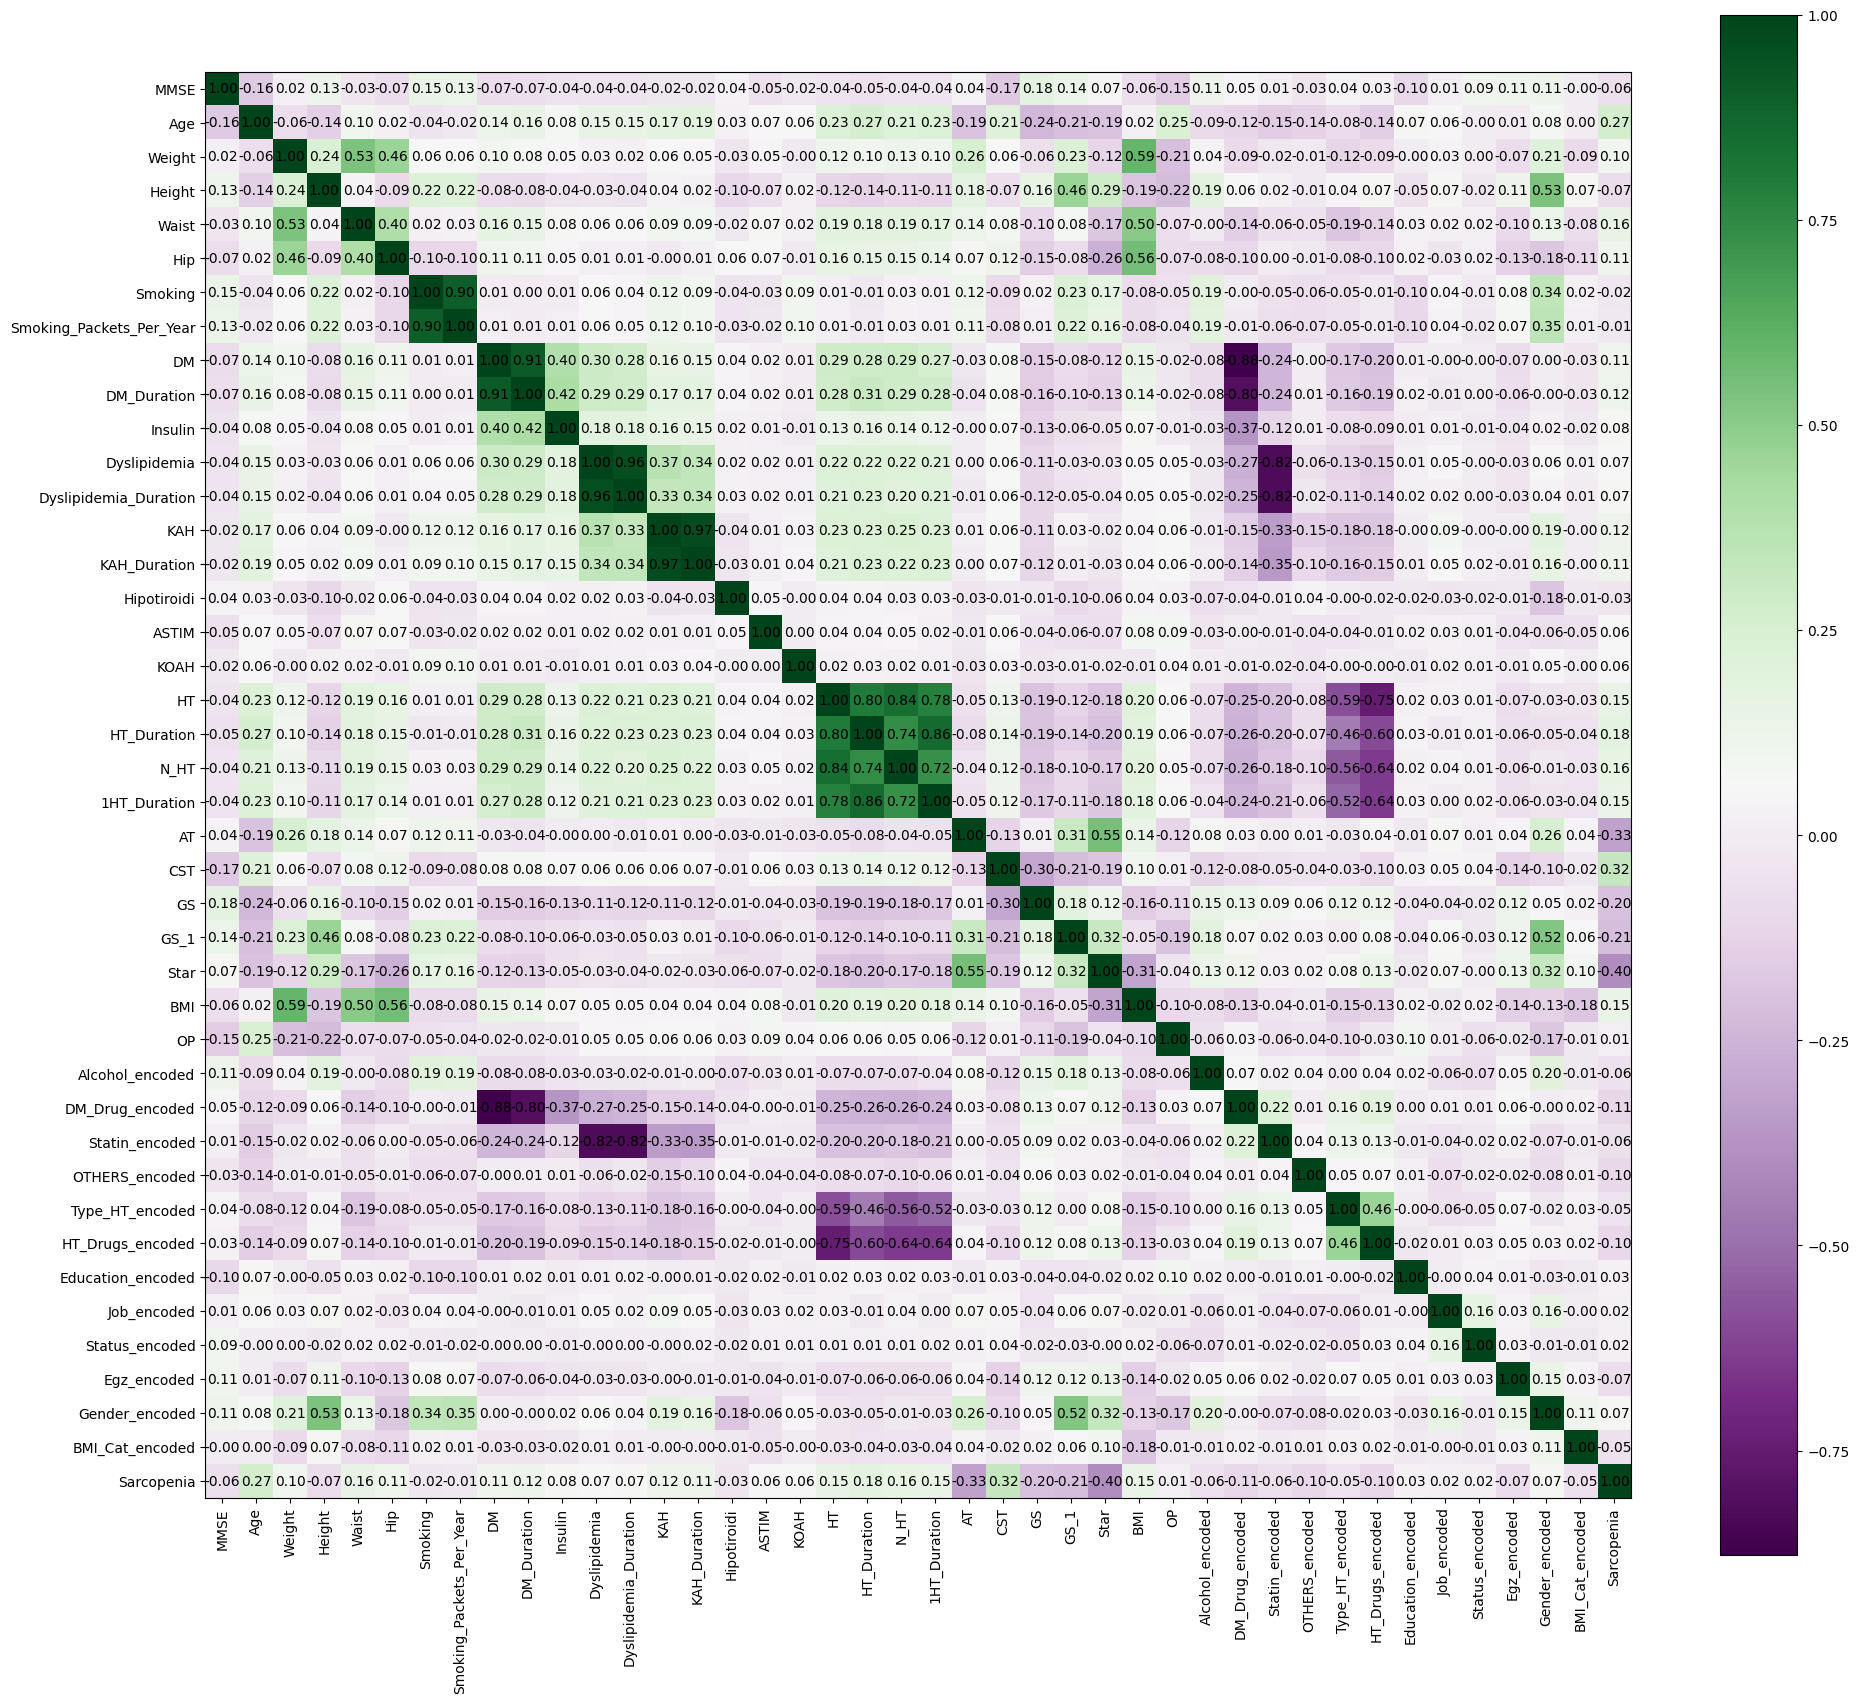

In [ ]:
# Data Visualization
# Draw heatmap to see correlation
import matplotlib.pyplot as plt

plt.figure(dpi = 150)
plt.figure(figsize=(23,20))

plt.imshow(corr,cmap = 'PRGn')
cbar = plt.colorbar(spacing='uniform')

plt.xticks(range(len(corr)),labels =corr.columns,rotation = 90)
plt.yticks(range(len(corr)),labels = corr.columns)

# Add text annotations for correlation values
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        plt.text(i, j, f"{corr.iloc[i, j]:.2f}", ha='center', va='center', color='black')

# Conclusion:
# Positive Correlation: Age, CST,
# Weak Positive Correlation: BMI, HT, HT_Duration, N_HT, 1HT_Duration
# Strong Negative Corr: Star, AT, GS_1, GS

plt.savefig('/content/gdrive/My Drive/Google Colab Folder/Sarcopenia_Project/corr_output.png', format = 'png', dpi = 300)

In [ ]:
# What is the impact of age to Sarcopenia
import plotly.express as px

# Above 60 years old there is higher chance of becoming Sarcopenia.
# In the dataset for the ages between 40-60, 8% of the population is Sarcopenia
#                for the ages betweeb 60-80, 25% of the population is Sarcopenia
# There is a direct relationship between Age and Sarcopenia

fig = px.histogram(df, x='Age', color='Sarcopenia',
                   title='Distribution of Sarcopenia by Age',
                   labels={'Age': 'Age', 'count': 'Frequency', 'Sarcopenia': 'Sarcopenia'},
                   nbins=20,  # Number of bins for age groups
                   opacity=0.6  # Adjust opacity for better visualization
                   )

fig.update_layout(xaxis_title='Age', yaxis_title='Frequency', barmode='overlay')

fig.show()


In [ ]:

# What is the impact of MMSE to Sarcopenia
import plotly.express as px

# When MMSE score is lower there is a higher chance of becoming Sarcopenia.
# In the dataset if MMSE score is between 20-24 1/4 of the population is Sarcopenia
#                if MMSE score is between 25-30 1/5 of the population is Sarcopenia
# There is a negative correleration between MMSE and Sarcopenia

fig = px.histogram(df, x='MMSE', color='Sarcopenia',
                   title='Distribution of Sarcopenia by MMSE',
                   labels={'MMSE': 'MMSE', 'count': 'Frequency', 'Sarcopenia': 'Sarcopenia'},
                   nbins=5,  # Number of bins for age groups
                   opacity=0.6  # Adjust opacity for better visualization
                   )

fig.update_layout(xaxis_title='MMSE', yaxis_title='Frequency', barmode='overlay')

fig.show()

In [ ]:
# What is the impact of BMI to Sarcopenia
import plotly.express as px

# When BMI score is higher there is a higher chance of becoming Sarcopenia.
# In the dataset if BMI is between 30-39.9 1/4 of the population is Sarcopenia
#                if BMI is between 40-49.9 almost 1/2 of the population is Sarcopenia
# There is a positive correleration between BMI and Sarcopenia

fig = px.histogram(df, x='BMI', color='Sarcopenia',
                   title='Distribution of Sarcopenia by BMI',
                   labels={'BMI': 'BMI', 'count': 'Frequency', 'Sarcopenia': 'Sarcopenia'},
                   nbins=10,  # Number of bins for age groups
                   opacity=0.6
                   )

fig.update_layout(xaxis_title='BMI', yaxis_title='Frequency', barmode='overlay')

fig.show()

In [ ]:
# What is the impact of OP to Sarcopenia
import plotly.express as px

# OP = 0 or OP = 1 the impact is somewhat same. Not a good determinator.
fig = px.histogram(df, x='OP', color='Sarcopenia',
                   title='Distribution of Sarcopenia by OP',
                   labels={'OP': 'OP', 'count': 'Frequency', 'Sarcopenia': 'Sarcopenia'},
                   nbins=2,  # Number of bins for groups
                   opacity=0.6
                   )

fig.update_layout(xaxis_title='OP', yaxis_title='Frequency', barmode='overlay')

fig.show()

In [ ]:
# What is the impact of HT to Sarcopenia
import plotly.express as px

# If the patience has HT there is higher chance of becoming Sarcopenia
fig = px.histogram(df, x='HT', color='Sarcopenia',
                   title='Distribution of Sarcopenia by HT',
                   labels={'HT': 'HT', 'count': 'Frequency', 'Sarcopenia': 'Sarcopenia'},
                   nbins=2,  # Number of bins for groups
                   opacity=0.6
                   )

fig.update_layout(xaxis_title='HT', yaxis_title='Frequency', barmode='overlay')

fig.show()

In [ ]:
# What is the impact of Egz to Sarcopenia
import plotly.express as px

# If you dont do exercise you have higher chance for Sarcopenia
# Used this feature but the results got worse

fig = px.histogram(df, x='Egz', color='Sarcopenia',
                   title='Distribution of Sarcopenia by Egz',
                   labels={'Egz': 'Egz', 'count': 'Frequency', 'Sarcopenia': 'Sarcopenia'},
                   nbins=5,  # Number of bins for groups
                   opacity=0.6
                   )

fig.update_layout(xaxis_title='Egz', yaxis_title='Frequency', barmode='overlay')

fig.show()

In [ ]:
# What is the impact of Star to Sarcopenia
import plotly.express as px

# If star is less than 1 you have higher chance of Sarcopenia

fig = px.histogram(df, x='Star', color='Sarcopenia',
                   title='Distribution of Sarcopenia by Star',
                   labels={'Star': 'Star', 'count': 'Frequency', 'Sarcopenia': 'Sarcopenia'},
                   nbins=10,  # Number of bins for groups
                   opacity=0.6
                   )

fig.update_layout(xaxis_title='Star', yaxis_title='Frequency', barmode='overlay')

fig.show()

In [ ]:
df.columns

Index(['MMSE', 'Age', 'Weight', 'Height', 'Waist', 'Hip', 'Smoking',
       'Smoking_Packets_Per_Year', 'Alcohol', 'DM', 'DM_Duration', 'Insulin',
       'DM_Drug', 'Dyslipidemia', 'Dyslipidemia_Duration', 'Statin', 'KAH',
       'KAH_Duration', 'Hipotiroidi', 'ASTIM', 'KOAH', 'OP', 'OTHERS', 'HT',
       'Type_HT', 'HT_Duration', 'N_HT', 'HT_Drugs', '1HT_Duration',
       'Education', 'Job', 'Status', 'Egz', 'AT', 'CST', 'GS', 'GS_1', 'Star',
       'BMI', 'Sarcopenia', 'Gender', 'BMI_Calc', 'BMI_Diff', 'BMI_Cat',
       'Alcohol_encoded', 'DM_Drug_encoded', 'Statin_encoded',
       'OTHERS_encoded', 'Type_HT_encoded', 'HT_Drugs_encoded',
       'Education_encoded', 'Job_encoded', 'Status_encoded', 'Egz_encoded',
       'Gender_encoded', 'BMI_Cat_encoded'],
      dtype='object')

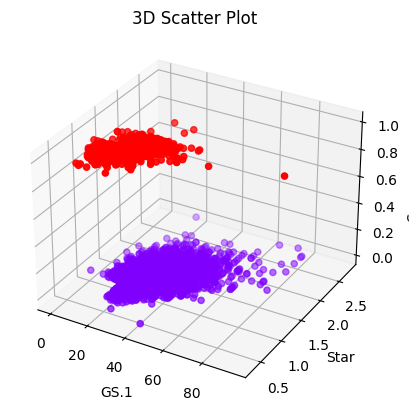

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

colors = df['Sarcopenia']


ax.scatter(df['GS_1'], df['Star'], df['Sarcopenia'], c=colors, marker='o', cmap='rainbow')

ax.set_xlabel('GS.1')
ax.set_ylabel('Star')
ax.set_zlabel('Sarcopenia')

plt.title('3D Scatter Plot')

plt.show()


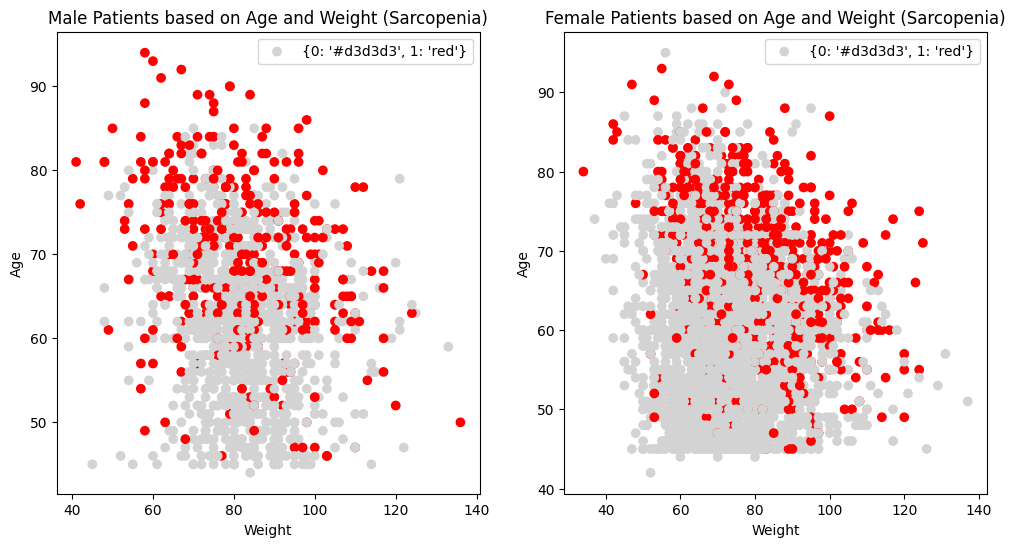

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline

fig,axis = plt.subplots(1,2,figsize = (12,6))

df_male = df[df['Gender']== 'M']
df_female = df[df['Gender']== 'F']

colormap = {0: '#d3d3d3', 1: 'red'}

axis[0].scatter(x = df_male['Weight'], y = df_male['Age'], c=[colormap[cat] for cat in df_male['Sarcopenia']], marker = 'o', label = colormap)
axis[0].set_xlabel('Weight')
axis[0].set_ylabel('Age')
axis[0].set_title('Male Patients based on Age and Weight (Sarcopenia)')
axis[0].legend()

axis[1].scatter(x = df_female['Weight'], y = df_female['Age'], c=[colormap[cat] for cat in df_female['Sarcopenia']], marker = 'o', label = colormap)
axis[1].set_xlabel('Weight')
axis[1].set_ylabel('Age')
axis[1].set_title('Female Patients based on Age and Weight (Sarcopenia)')
axis[1].legend()

# Both Female and Male Sarcopenia patients loose weight as they get older


In [ ]:
# Patients diagnosed as Sarcopenia Also Diagnosed as KOAH,Insulin, KAH, and ASTIM

col_cat = [
"Smoking",
"DM",
"Insulin",
"Dyslipidemia",
"KAH",
"Hipotiroidi",
"ASTIM",
"KOAH",
"HT"]
for col in col_cat:
  print(str(col) +' : ' + str((df[df['Sarcopenia'] == 1][col].sum()/df[col].sum()).round(2)))



Smoking : 0.19
DM : 0.27
Insulin : 0.32
Dyslipidemia : 0.26
KAH : 0.32
Hipotiroidi : 0.17
ASTIM : 0.32
KOAH : 0.4
HT : 0.25


In [ ]:
# DATA SET PREPRATION / PREPROCESSING #

In [ ]:
df.isnull().sum().sort_values(ascending= False)

Statin                    4331
OTHERS                    3762
DM drug                   3555
Type_HT                   3178
OP                        2970
HT drugs                  2318
MMSE                       901
Duration of 1HT            490
Job                        334
Status                     215
Dıration of HT             182
N_HT                       163
Dyslipidemia duration      127
Waist                      113
Hip                        111
DM duration                 87
KAH duration                74
Education                   65
Egz                         63
Star                        21
İnsülin                     15
GS                          14
BMI                         12
AT                          11
Height                       9
Weight                       9
CST                          6
GS.1                         3
DM                           2
 Smoking (packet/year)       2
HT                           1
Age                          1
Ad      

In [ ]:
# HANDLE MISSING DATA & Drop null data points
filter_columns = [
    'MMSE', 'Age', 'Weight', 'Height', 'Waist', 'Hip', 'Smoking', 'Smoking_Packets_Per_Year',
    'DM', 'DM_Duration', 'Insulin', 'Dyslipidemia', 'Dyslipidemia_Duration', 'KAH',
    'KAH_Duration', 'Hipotiroidi', 'ASTIM', 'KOAH', 'HT', 'HT_Duration', 'N_HT',
    '1HT_Duration', 'AT', 'CST', 'GS', 'GS_1', 'Star', 'BMI',
    'Alcohol', 'DM_Drug', 'Statin', 'OP', 'OTHERS', 'Type_HT', 'HT_Drugs',
    'Education', 'Job', 'Status', 'Egz', 'Gender','BMI_Cat','BMI_Cat_encoded','Sarcopenia',
    'Alcohol_encoded','Statin_encoded','OTHERS_encoded','Type_HT_encoded',
    'Job_encoded','Status_encoded','Egz_encoded','Gender_encoded']

cleaned_df = pd.DataFrame()

#for col in filter_columns:
  #cleaned_df[col] = df[col].dropna().reset_index(drop=True)


#cleaned_df = df.copy()
for col in filter_columns:
  cleaned_df[col] = df[col]

# If no medication used replace it with None
cleaned_df['Statin'] = cleaned_df['Statin'].fillna('None')
cleaned_df['OTHERS'] = cleaned_df['OTHERS'].fillna('None')
cleaned_df['DM_Drug'] = cleaned_df['DM_Drug'].fillna('None')
cleaned_df['Type_HT'] = cleaned_df['Type_HT'].fillna('None')
cleaned_df['HT_Drugs'] = cleaned_df['HT_Drugs'].fillna('None')

cleaned_df['Education'] = cleaned_df['Education'].fillna('None')
cleaned_df['Job'] = cleaned_df['Job'].fillna('None')
cleaned_df['Status'] = cleaned_df['Status'].fillna('None')

cleaned_df['Smoking_Packets_Per_Year'] = cleaned_df['Smoking_Packets_Per_Year'].fillna(-1)
cleaned_df['Dyslipidemia_Duration'] = cleaned_df['Dyslipidemia_Duration'].fillna(-1)

cleaned_df['KAH_Duration'] = cleaned_df['KAH_Duration'].fillna(-1) # Replace empty values with -1
cleaned_df['HT_Duration'] = cleaned_df['HT_Duration'].fillna(-1) # Replace empty values with -1
cleaned_df['DM_Duration'] = cleaned_df['DM_Duration'].fillna(-1) # Replace empty values with -1
cleaned_df['1HT_Duration'] = cleaned_df['1HT_Duration'].fillna(-1) # Replace empty values with -1

cleaned_df['OP'] = cleaned_df['OP'].fillna(-1) # Replace empty values with -1
cleaned_df['Egz'] = cleaned_df['Egz'].fillna(-1) # Replace empty values with -1
cleaned_df['MMSE'] = cleaned_df['MMSE'].fillna(-1) # Replace empty values with -1
cleaned_df['Hip'] = cleaned_df['Hip'].fillna(-1) # Replace empty values with -1
cleaned_df['Waist'] = cleaned_df['Waist'].fillna(-1) # Replace empty values with -1
cleaned_df['N_HT'] = cleaned_df['N_HT'].fillna(-1) # Replace empty values with -1

# Delete the rest of the missing data
cleaned_df = cleaned_df.dropna().reset_index(drop=True)

In [ ]:
cleaned_df = cleaned_df[[
    'MMSE', 'Age', 'Weight', 'Height', 'Waist', 'Hip', 'Smoking', 'Smoking_Packets_Per_Year',
    'DM', 'DM_Duration', 'Insulin', 'Dyslipidemia', 'Dyslipidemia_Duration', 'KAH',
    'KAH_Duration', 'Hipotiroidi', 'ASTIM', 'KOAH', 'HT', 'HT_Duration', 'N_HT',
    '1HT_Duration', 'AT', 'CST', 'GS', 'GS_1', 'Star', 'BMI',
    'Alcohol', 'DM_Drug', 'Statin', 'OP', 'OTHERS', 'Type_HT', 'HT_Drugs',
    'Education', 'Job', 'Status', 'Egz', 'Gender','BMI_Cat','BMI_Cat_encoded','Sarcopenia',
    'Alcohol_encoded','Statin_encoded', 'OTHERS_encoded','Type_HT_encoded','Job_encoded','Status_encoded','Egz_encoded','Gender_encoded']]

In [ ]:
cleaned_df

,MMSE,Age,Weight,Height,Waist,Hip,Smoking,Smoking_Packets_Per_Year,DM,DM_Duration,...,BMI_Cat_encoded,Sarcopenia,Alcohol_encoded,Statin_encoded,OTHERS_encoded,Type_HT_encoded,Job_encoded,Status_encoded,Egz_encoded,Gender_encoded
0,29.0,74.0,88.0,178.0,113.0,113.0,1,10.0,1.0,10.0,...,3,0,5,23,20,58,285,13,2,1
1,30.0,62.0,105.0,172.0,125.0,110.0,1,30.0,0.0,0.0,...,2,1,5,23,31,80,160,13,0,1
2,28.0,65.0,89.0,169.0,110.0,114.0,0,0.0,0.0,0.0,...,2,0,0,23,484,80,101,13,2,1
3,29.0,71.0,68.0,160.0,103.0,100.0,1,5.0,0.0,0.0,...,3,0,0,23,264,38,7,13,1,0
4,27.0,61.0,80.0,160.0,102.0,105.0,0,0.0,0.0,0.0,...,2,0,0,23,235,54,103,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4863,30.0,70.0,73.0,143.0,103.0,111.0,0,0.0,1.0,-1.0,...,2,1,0,23,78,80,229,27,0,0
4864,29.0,72.0,78.0,160.0,100.0,108.0,0,0.0,0.0,0.0,...,2,0,0,6,452,80,229,27,2,0
4865,30.0,79.0,95.0,180.0,100.0,114.0,0,0.0,0.0,0.0,...,3,0,0,6,135,80,248,27,0,1
4866,30.0,85.0,96.0,161.0,106.0,107.0,0,0.0,0.0,0.0,...,2,1,0,6,264,80,248,27,0,1


In [ ]:
rows_with_missing_values = cleaned_df[cleaned_df.isna().any(axis=1)]
rows_with_missing_values

,MMSE,Age,Weight,Height,Waist,Hip,Smoking,Smoking_Packets_Per_Year,DM,DM_Duration,...,BMI_Cat_encoded,Sarcopenia,Alcohol_encoded,Statin_encoded,OTHERS_encoded,Type_HT_encoded,Job_encoded,Status_encoded,Egz_encoded,Gender_encoded


In [ ]:
# MODEL SELECTION #

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import metrics

In [ ]:
steps_num = [('imputer', SimpleImputer(strategy = 'mean')),
             ('scaler', StandardScaler())] # Use the Scaler to normalize data

steps_cat = [('imputer', SimpleImputer(strategy ='most_frequent')),
             ('oneHot', OneHotEncoder(handle_unknown='ignore'))]

numeric_transformator = Pipeline(steps = steps_num)

numeric_features = ['MMSE', 'Age', 'Weight', 'Height', 'Waist', 'Hip', 'Smoking', 'Smoking_Packets_Per_Year',
    'DM', 'DM_Duration', 'Insulin', 'Dyslipidemia', 'Dyslipidemia_Duration', 'KAH',
    'KAH_Duration', 'Hipotiroidi', 'ASTIM', 'KOAH', 'HT', 'HT_Duration', 'N_HT',
    '1HT_Duration', 'AT', 'CST', 'GS', 'GS_1', 'Star', 'BMI']

categoric_transformer = Pipeline(steps = steps_cat)

categoric_features =['Alcohol', 'DM_Drug', 'Statin', 'OP', 'OTHERS', 'Type_HT', 'HT_Drugs',
    'Education', 'Job', 'Status', 'Egz', 'Gender','BMI_Cat']


# Positive Correlation: Age, CST,
# Weak Positive Correlation: MMSE, BMI, HT, HT_Duration, N_HT, 1HT_Duration
# Strong Negative Corr: Star, AT, GS_1, GS

In [ ]:
preprocessor = ColumnTransformer(transformers = [('num', numeric_transformator, numeric_features ),
                                                 ('cat', categoric_transformer, categoric_features)])


# **Test the data with the Logistic Regression Model**

In [ ]:
log_model = Pipeline(steps = [('preprocessor', preprocessor),
                        ('regression', LogisticRegression())]
               )

In [ ]:
# Test with the full data set instead of cleaned dataframe
y = df['Sarcopenia']
X = df.drop('Sarcopenia', axis =1)

In [ ]:
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state =42)

In [ ]:
log_model.fit(X_train,y_train)

In [ ]:
y_pred = log_model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,f1_score, recall_score, classification_report

In [ ]:
# Evaluate Model's Performance
accuracy = accuracy_score(y_test,y_pred)
precision =precision_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)


confusion = confusion_matrix(y_test,y_pred)
print(f'Accuracy Score: {accuracy:.2f} - Overall correctness of the model. Accuracy = (TP + TN) / (TP + TN + FP + FN)\n')
print(f'Precision Score: {precision:.2f} - Measures accuracy of positive predictions of the model. Precision = TP / (TP + FP).\nFocuses on minimizing false positives, important when false alarms are costly (e.g spam email detection) \n')
print(f'Recall Score: {recall:.2f} - Sensivity or True Positive Rate. Measures how well model captures all positive instances. Recall = TP/ (TP + FN). \nFocuses on capturing as many true positives as possible, important when missing positives is costly(e.g medical diagnosis)\n')
print(f'F1 Score: {f1:.2f} - Hormonic mean of precision and recall. F1 Score = 2 * (Precision * Recall) / (Precision + Recall)\n')

print(f'Confusin Matrix Score TN: {confusion[0][0]}')
print(f'Confusin Matrix Score TP: {confusion[1][1]}')
print(f'Confusin Matrix Score FP: {confusion[0][1]}')
print(f'Confusin Matrix Score FN: {confusion[1][0]}')

In [ ]:
classification_rep = classification_report(y_test,y_pred)
print(classification_rep)

##  Test the data with XGBOOST Model

XGboost combines the prediction of multiple decision trees.

*   It has better predictive accuracy compare to decision tree
*   It reduces the risk of overfitting and bias that can occur with a single decision tree. It uses regularization techniques.
*   It sequentially adds trees to the model with each tree correcting errors of previous ones.
*   It was designed to be used with large and complicated data sets. It can handle both small and large data sets.





In [ ]:
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,f1_score, recall_score, classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
xgb_model = Pipeline(steps=[('preprocessor',preprocessor),('xgb',xgb.XGBClassifier())])

In [ ]:
y = df['Sarcopenia']
X = df.drop('Sarcopenia', axis =1)

X_train, X_test, y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state =42)

In [ ]:
xgb_model.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['MMSE', 'Age', 'Weight',
                                                   'Height', 'Waist', 'Hip',
                                                   'Smoking',
                                                   'Smoking_Packets_Per_Year',
                                                   'DM', 'DM_Duration',
                                                   'Insulin', 'Dyslipidemia',
                                                   'Dyslipidemia_Duration',
                                                   'KAH', 'KAH_Duration',
                                                   'Hipotiroidi', 'ASTIM',
                                                   'KOAH', 'HT'...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [ ]:
y_pred = xgb_model.predict(X_test)

In [ ]:
# Evaluate Model's Performance
accuracy = accuracy_score(y_test,y_pred)
precision =precision_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)


confusion = confusion_matrix(y_test,y_pred)
print(f'Accuracy Score: {accuracy:.2f} - Overall correctness of the model. Accuracy = (TP + TN) / (TP + TN + FP + FN)\n')
print(f'Precision Score: {precision:.2f} - Measures accuracy of positive predictions of the model. Precision = TP / (TP + FP).\nFocuses on minimizing false positives, important when false alarms are costly (e.g spam email detection) \n')
print(f'Recall Score: {recall:.2f} - Sensivity or True Positive Rate. Measures how well model captures all positive instances. Recall = TP/ (TP + FN). \nFocuses on capturing as many true positives as possible, important when missing positives is costly(e.g medical diagnosis)\n')
print(f'F1 Score: {f1:.2f} - Hormonic mean of precision and recall. F1 Score = 2 * (Precision * Recall) / (Precision + Recall)\n')


print(f'Confusin Matrix Score TN: {confusion[0][0]}')
print(f'Confusin Matrix Score TP: {confusion[1][1]}')
print(f'Confusin Matrix Score FP: {confusion[0][1]}')
print(f'Confusin Matrix Score FN: {confusion[1][0]}')

Accuracy Score: 1.00 - Overall correctness of the model. Accuracy = (TP + TN) / (TP + TN + FP + FN)

Precision Score: 1.00 - Measures accuracy of positive predictions of the model. Precision = TP / (TP + FP).
Focuses on minimizing false positives, important when false alarms are costly (e.g spam email detection) 

Recall Score: 0.99 - Sensivity or True Positive Rate. Measures how well model captures all positive instances. Recall = TP/ (TP + FN). 
Focuses on capturing as many true positives as possible, important when missing positives is costly(e.g medical diagnosis)

F1 Score: 1.00 - Hormonic mean of precision and recall. F1 Score = 2 * (Precision * Recall) / (Precision + Recall)

Confusin Matrix Score TN: 769
Confusin Matrix Score TP: 213
Confusin Matrix Score FP: 0
Confusin Matrix Score FN: 2


In [ ]:
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)
cv_scores = cross_val_score(xgb_model, X, y, cv=kf, scoring='recall')
print(f'CV Score Mean: {cv_scores.mean():.5f}')
print(f'CV Score Std Deviation: {cv_scores.std():.5f}')

CV Score Mean: 0.99049
CV Score Std Deviation: 0.00833


In [ ]:
cv_scores

array([0.98139535, 0.98139535, 0.98963731, 1.        , 1.        ])

In [ ]:
classification_rep = classification_report(y_test,y_pred)
print(classification_rep)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       769
           1       1.00      0.99      1.00       215

    accuracy                           1.00       984
   macro avg       1.00      1.00      1.00       984
weighted avg       1.00      1.00      1.00       984



In [ ]:
# Access the feature importances
importances = xgb_model.named_steps['xgb'].feature_importances_

# Map importances to feature names for better understanding
feature_names = df.columns
feature_importance_dict = dict(zip(feature_names, importances))

In [ ]:
sorted_feature_importance_dict = dict(sorted(feature_importance_dict.items(), key = lambda x: x[1],reverse = True))

In [ ]:
for key, value in sorted_feature_importance_dict.items():
  if value > 0:
    print(f'{key}: {value:.4f}')

N_HT: 0.4678
HT_Duration: 0.1905
HT: 0.1690
OTHERS: 0.0077
Dyslipidemia_Duration: 0.0067
DM: 0.0029
Age: 0.0020
Smoking_Packets_Per_Year: 0.0018
Height: 0.0016
OP: 0.0011
Waist: 0.0005
MMSE: 0.0005
HT_Drugs: 0.0004
Weight: 0.0004
Hip: 0.0003
Type_HT: 0.0001


In [ ]:
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
len(numeric_columns)

44

In [ ]:
# Create a pickle file from the model with selected features
import pickle


y = df['Sarcopenia']
X_subset = df[['GS_1','Gender_encoded','CST','Star']]

X_train, X_test, y_train,y_test = train_test_split(X_subset,y, test_size = 0.2, random_state =42)

xgb_model_features = xgb.XGBClassifier()

xgb_model_features.fit(X_train,y_train)

y_pred = xgb_model_features.predict(X_test)


# Evaluate Model's Performance
precision =precision_score(y_test,y_pred)

confusion = confusion_matrix(y_test,y_pred)

print(f'Precision Score: {precision:.2f} - Measures accuracy of positive predictions of the model. Precision = TP / (TP + FP).\nFocuses on minimizing false positives, important when false alarms are costly (e.g spam email detection) \n')

print(f'Confusin Matrix Score TN: {confusion[0][0]}')
print(f'Confusin Matrix Score TP: {confusion[1][1]}')
print(f'Confusin Matrix Score FP: {confusion[0][1]}')
print(f'Confusin Matrix Score FN: {confusion[1][0]}')

with open('/content/gdrive/My Drive/Google Colab Folder/Sarcopenia_Project/model_file/Sarcopenia_Model_SF.pkl', 'wb') as model_file:
    pickle.dump(xgb_model_features, model_file)

Precision Score: 1.00 - Measures accuracy of positive predictions of the model. Precision = TP / (TP + FP).
Focuses on minimizing false positives, important when false alarms are costly (e.g spam email detection) 

Confusin Matrix Score TN: 769
Confusin Matrix Score TP: 213
Confusin Matrix Score FP: 0
Confusin Matrix Score FN: 2


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MMSE,4020.0,27.638806,2.855809,9.00,27.00,28.00,30.0000,30.00
Age,4915.0,61.978026,9.682397,42.00,54.00,62.00,69.0000,95.00
Weight,4916.0,76.608421,13.711125,34.00,67.00,76.00,85.0000,137.00
Height,4916.0,160.506509,8.935997,125.00,155.00,160.00,166.0000,196.00
Waist,4805.0,98.141103,19.341708,0.00,90.00,98.00,106.0000,915.00
Hip,4807.0,110.968796,14.529157,0.00,102.00,109.00,117.0000,191.00
Smoking,4916.0,0.319772,0.466436,0.00,0.00,0.00,1.0000,1.00
Smoking_Packets_Per_Year,4914.0,8.191087,16.091571,0.00,0.00,0.00,10.0000,150.00
DM,4914.0,0.304843,0.460388,0.00,0.00,0.00,1.0000,1.00
DM_Duration,4829.0,3.119901,6.532819,0.00,0.00,0.00,2.0000,40.00


In [ ]:
df.iloc[0:1,:][['GS_1','Gender_encoded','CST','Star', 'Sarcopenia']]

,GS_1,Gender_encoded,CST,Star,Sarcopenia
0,32.0,1,12.5,1.81,0


In [ ]:
# Load the model from the pickle file
with open('/content/gdrive/My Drive/Google Colab Folder/Sarcopenia_Project/model_file/Sarcopenia_Model_SF.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

# Use manual input data
input_data = pd.DataFrame({
    'GS_1': [32],
    'Gender_encoded': [1],
    'CST': [12.5],
    'Star': [1.81]
})

# Make predictions
predictions = loaded_model.predict(input_data)

# Display or use the predictions
print("Model Predictions:", predictions)

Model Predictions: [0]


In [ ]:
# Create an Inclusion Table (feature, recall score and Confusion Matrix values)
# Used Greedy Forward Search for feature selection

In [ ]:
import xgboost as xgb

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,f1_score, recall_score, classification_report

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
import xgboost as xgb

import warnings

# Temporarily suppress all warnings
warnings.filterwarnings('ignore')

features = ['MMSE',
 'Age','Weight','Height','Waist','Hip','Smoking','Smoking_Packets_Per_Year','DM','DM_Duration','Insulin',
 'Dyslipidemia','Dyslipidemia_Duration','KAH','KAH_Duration','Hipotiroidi', 'ASTIM', 'KOAH', 'HT',
 'HT_Duration','N_HT', '1HT_Duration', 'AT', 'CST','GS','GS_1','Star','BMI','OP',
 'Alcohol_encoded','Statin_encoded','OTHERS_encoded','Type_HT_encoded','Job_encoded','Status_encoded',
 'Egz_encoded','Gender_encoded','BMI_Cat_encoded']

y = df['Sarcopenia']
X = df.drop('Sarcopenia', axis =1)

# Initialize an empty set for selected features
selected_features = set()

# Define the number of features to select
num_features_to_select = 15  # You can change this value as needed

k = 5  # Number of folds

# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=['Selected_Features', 'Recall','CV_Score_Mean','CV_Score_Deviation','TN','TP','FP','FN'])

while len(selected_features) < num_features_to_select:
    best_feature = None
    best_recall = 0.0

    for feature in set(features) - selected_features:
        current_features = list(selected_features) + [feature]
        X_subset = X[current_features]

        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X_subset, y, test_size=0.2, random_state=42)

        # Train an XGBoost model
        xgb_model = xgb.XGBClassifier()
        xgb_model.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = xgb_model.predict(X_test)

        # Calculate recall score
        recall = recall_score(y_test, y_pred)

        if recall > best_recall:
            best_recall = recall
            best_feature = feature
            kf = KFold(n_splits=k, shuffle=True, random_state=42)
            cv_scores = cross_val_score(xgb_model, X_subset, y, cv=kf, scoring='recall')
            confusion = confusion_matrix(y_test,y_pred)

    if best_feature is not None:
      selected_features.add(best_feature)
      results_df = results_df.append({'Selected_Features': ', '.join(selected_features), 'Recall': best_recall, 'CV_Score_Mean': cv_scores.mean(), 'CV_Score_Deviation': cv_scores.std(),'TN':confusion[0][0] , 'TP':confusion[1][1] , 'FP':confusion[0][1] , 'FN':confusion[1][0]}, ignore_index=True)

# Print the selected features and their corresponding recall scores
print(results_df)



In [ ]:
results_df['Recall'].round(3)
# Print the selected features and their corresponding recall scores
results_df = results_df.sort_values(by = 'Recall', ascending = False)

results_df.to_csv('/content/gdrive/My Drive/Google Colab Folder/Sarcopenia_Project/feature_selection_results_xgboost.csv', index=False)

## Test the data with Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
decision_tree_model = Pipeline(steps = [('preprocessor',preprocessor),('decision_tree',DecisionTreeClassifier(random_state =42))])

In [ ]:
y = df['Sarcopenia']
X = df.drop('Sarcopenia', axis =1)
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state =42)

In [ ]:
decision_tree_model.fit(X_train,y_train)

In [ ]:
y_pred = decision_tree_model.predict(X_test)

In [ ]:
# Evaluate Model's Performance
accuracy = accuracy_score(y_test,y_pred)
precision =precision_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)


confusion = confusion_matrix(y_test,y_pred)
print(f'Accuracy Score: {accuracy:.2f} - Overall correctness of the model. Accuracy = (TP + TN) / (TP + TN + FP + FN)\n')
print(f'Precision Score: {precision:.2f} - Measures accuracy of positive predictions of the model. Precision = TP / (TP + FP).\nFocuses on minimizing false positives, important when false alarms are costly (e.g spam email detection) \n')
print(f'Recall Score: {recall:.2f} - Sensivity or True Positive Rate. Measures how well model captures all positive instances. Recall = TP/ (TP + FN). \nFocuses on capturing as many true positives as possible, important when missing positives is costly(e.g medical diagnosis)\n')
print(f'F1 Score: {f1:.2f} - Hormonic mean of precision and recall. F1 Score = 2 * (Precision * Recall) / (Precision + Recall)\n')


print(f'Confusin Matrix Score TN: {confusion[0][0]}')
print(f'Confusin Matrix Score TP: {confusion[1][1]}')
print(f'Confusin Matrix Score FP: {confusion[0][1]}')
print(f'Confusin Matrix Score FN: {confusion[1][0]}')

In [ ]:
classification_rep = classification_report(y_test,y_pred)
print(classification_rep)

# Test the data with Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random_forest_model = Pipeline([('preprocessor',preprocessor),('random_forest',RandomForestClassifier())])

In [ ]:
y = df['Sarcopenia']
X = df.drop('Sarcopenia', axis =1)
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state =42)

In [ ]:
random_forest_model.fit(X_train,y_train)

In [ ]:
y_pred = random_forest_model.predict(X_test)

In [ ]:
# Evaluate Model's Performance
accuracy = accuracy_score(y_test,y_pred)
precision =precision_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)


confusion = confusion_matrix(y_test,y_pred)
print(f'Accuracy Score: {accuracy:.2f} - Overall correctness of the model. Accuracy = (TP + TN) / (TP + TN + FP + FN)\n')
print(f'Precision Score: {precision:.2f} - Measures accuracy of positive predictions of the model. Precision = TP / (TP + FP).\nFocuses on minimizing false positives, important when false alarms are costly (e.g spam email detection) \n')
print(f'Recall Score: {recall:.2f} - Sensivity or True Positive Rate. Measures how well model captures all positive instances. Recall = TP/ (TP + FN). \nFocuses on capturing as many true positives as possible, important when missing positives is costly(e.g medical diagnosis)\n')
print(f'F1 Score: {f1:.2f} - Hormonic mean of precision and recall. F1 Score = 2 * (Precision * Recall) / (Precision + Recall)\n')


print(f'Confusin Matrix Score TN: {confusion[0][0]}')
print(f'Confusin Matrix Score TP: {confusion[1][1]}')
print(f'Confusin Matrix Score FP: {confusion[0][1]}')
print(f'Confusin Matrix Score FN: {confusion[1][0]}')

In [ ]:
classification_rep = classification_report(y_test,y_pred)
print(classification_rep)

# Suppoprt is to see if the data is imbalanced or not

In [ ]:
# Used Greedy forward search to select the best features

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.ensemble import RandomForestClassifier


import warnings

# Temporarily suppress all warnings
warnings.filterwarnings('ignore')

features = ['MMSE',
 'Age','Weight','Height','Waist','Hip','Smoking','Smoking_Packets_Per_Year','DM','DM_Duration','Insulin',
 'Dyslipidemia','Dyslipidemia_Duration','KAH','KAH_Duration','Hipotiroidi', 'ASTIM', 'KOAH', 'HT',
 'HT_Duration','N_HT', '1HT_Duration', 'AT', 'CST','GS','GS_1','Star','BMI','OP',
 'Alcohol_encoded','Statin_encoded','OTHERS_encoded','Type_HT_encoded','Job_encoded','Status_encoded',
 'Egz_encoded','Gender_encoded','BMI_Cat_encoded']

y = cleaned_df['Sarcopenia']
X = cleaned_df.drop('Sarcopenia', axis =1)

# Initialize an empty set for selected features
selected_features = set()

# Define the number of features to select
num_features_to_select = 15  # You can change this value as needed

k = 5  # Number of folds

# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=['Selected_Features', 'Recall','CV_Score_Mean','CV_Score_Deviation','TN','TP','FP','FN'])

while len(selected_features) < num_features_to_select:
    best_feature = None
    best_recall = 0.0

    for feature in set(features) - selected_features:
        current_features = list(selected_features) + [feature]
        X_subset = X[current_features]

        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X_subset, y, test_size=0.2, random_state=42)

        # Train an XGBoost model
        random_forest_model = RandomForestClassifier()
        random_forest_model.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = random_forest_model.predict(X_test)

        # Calculate recall score
        recall = recall_score(y_test, y_pred)

        if recall > best_recall:
            best_recall = recall
            best_feature = feature
            kf = KFold(n_splits=k, shuffle=True, random_state=42)
            cv_scores = cross_val_score(random_forest_model, X_subset, y, cv=kf, scoring='recall')
            confusion = confusion_matrix(y_test,y_pred)

    if best_feature is not None:
      selected_features.add(best_feature)
      results_df = results_df.append({'Selected_Features': ', '.join(selected_features), 'Recall': best_recall, 'CV_Score_Mean': cv_scores.mean(), 'CV_Score_Deviation': cv_scores.std(),'TN':confusion[0][0] , 'TP':confusion[1][1] , 'FP':confusion[0][1] , 'FN':confusion[1][0]}, ignore_index=True)

# Print the selected features and their corresponding recall scores
print(results_df)



In [ ]:
results_df['Recall'].round(3)
# Print the selected features and their corresponding recall scores
results_df = results_df.sort_values(by = 'Recall', ascending = False)

results_df.to_csv('/content/gdrive/My Drive/Google Colab Folder/Sarcopenia_Project/feature_selection_results_randomforest.csv', index=False)

In [ ]:
results_df = results_df.sort_values(by = 'Recall', ascending=False)


In [ ]:
results_df['Recall'] = pd.to_numeric(results_df['Recall'])
results_df['Recall'] = results_df['Recall'].apply(lambda x: f'{x:.3f}')
results_df['Model'] = "RandomForest"

In [ ]:
results_df.to_excel('/content/gdrive/My Drive/Google Colab Folder/Sarcopenia_Project/Sarco_Inclusion_Table_RandomForest.xlsx', index=False)

In [ ]:
# Create a pickle file from the model with selected features
import pickle


y = cleaned_df['Sarcopenia']
X_subset = cleaned_df[['GS_1','Gender_encoded','CST','Star']]

X_train, X_test, y_train,y_test = train_test_split(X_subset,y, test_size = 0.2, random_state =42)

random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)

y_pred = random_forest_model.predict(X_test)


# Evaluate Model's Performance
precision =precision_score(y_test,y_pred)

confusion = confusion_matrix(y_test,y_pred)

print(f'Precision Score: {precision:.2f} - Measures accuracy of positive predictions of the model. Precision = TP / (TP + FP).\nFocuses on minimizing false positives, important when false alarms are costly (e.g spam email detection) \n')

print(f'Confusin Matrix Score TN: {confusion[0][0]}')
print(f'Confusin Matrix Score TP: {confusion[1][1]}')
print(f'Confusin Matrix Score FP: {confusion[0][1]}')
print(f'Confusin Matrix Score FN: {confusion[1][0]}')


with open('/content/gdrive/My Drive/Google Colab Folder/Sarcopenia_Project/model_file/sar_model_random.sav', 'wb') as model_file:
    pickle.dump(random_forest_model, model_file)

# **Test data with the SVM Model**

In [ ]:
from sklearn import svm

In [ ]:
svm_model = Pipeline(steps = [('preprocessor',preprocessor),('svm',svm.SVC(random_state =42))])

In [ ]:
y = df['Sarcopenia']
X = df.drop('Sarcopenia', axis =1)

X_train, X_test, y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state =42)

In [ ]:
svm_model.fit(X_train,y_train)

In [ ]:
y_pred = svm_model.predict(X_test)

In [ ]:
# Evaluate Model's Performance
accuracy = accuracy_score(y_test,y_pred)
precision =precision_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)


confusion = confusion_matrix(y_test,y_pred)
print(f'Accuracy Score: {accuracy:.2f} - Overall correctness of the model. Accuracy = (TP + TN) / (TP + TN + FP + FN)\n')
print(f'Precision Score: {precision:.2f} - Measures accuracy of positive predictions of the model. Precision = TP / (TP + FP).\nFocuses on minimizing false positives, important when false alarms are costly (e.g spam email detection) \n')
print(f'Recall Score: {recall:.2f} - Sensivity or True Positive Rate. Measures how well model captures all positive instances. Recall = TP/ (TP + FN). \nFocuses on capturing as many true positives as possible, important when missing positives is costly(e.g medical diagnosis)\n')
print(f'F1 Score: {f1:.2f} - Hormonic mean of precision and recall. F1 Score = 2 * (Precision * Recall) / (Precision + Recall)\n')


print(f'Confusin Matrix Score TN: {confusion[0][0]}')
print(f'Confusin Matrix Score TP: {confusion[1][1]}')
print(f'Confusin Matrix Score FP: {confusion[0][1]}')
print(f'Confusin Matrix Score FN: {confusion[1][0]}')

In [ ]:
classification_rep = classification_report(y_test,y_pred)
print(classification_rep)

# Suppoprt is to see if the data is imbalanced or not

# Test Data With An UNSUPERVISED MACHINE LEARNING MODEL (K-Means)

In [ ]:
# Cluster the Dataset to find similarities

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

sns.set() # Set the default seaborn theme/styles
%matplotlib inline

plt.rcParams['figure.figsize'] = (12,6) # Set the default figure size

In [ ]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4868 entries, 0 to 4867
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MMSE                      4868 non-null   float64
 1   Age                       4868 non-null   float64
 2   Weight                    4868 non-null   float64
 3   Height                    4868 non-null   float64
 4   Waist                     4868 non-null   float64
 5   Hip                       4868 non-null   float64
 6   Smoking                   4868 non-null   int64  
 7   Smoking_Packets_Per_Year  4868 non-null   float64
 8   DM                        4868 non-null   float64
 9   DM_Duration               4868 non-null   float64
 10  Insulin                   4868 non-null   float64
 11  Dyslipidemia              4868 non-null   int64  
 12  Dyslipidemia_Duration     4868 non-null   float64
 13  KAH                       4868 non-null   int64  
 14  KAH_Dura

In [ ]:
df_analyze = cleaned_df[['Age','BMI']]
df_analyze = cleaned_df[['MMSE', 'Age', 'Weight', 'Height', 'Waist', 'Hip', 'Smoking', 'Smoking_Packets_Per_Year',
    'DM', 'DM_Duration', 'Insulin', 'Dyslipidemia', 'Dyslipidemia_Duration', 'KAH',
    'KAH_Duration', 'Hipotiroidi', 'ASTIM', 'KOAH', 'HT', 'HT_Duration', 'N_HT',
    '1HT_Duration', 'AT', 'CST', 'GS', 'GS_1', 'Star', 'BMI', 'OP']]

In [ ]:
df_analyze.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4868 entries, 0 to 4867
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MMSE                      4868 non-null   float64
 1   Age                       4868 non-null   float64
 2   Weight                    4868 non-null   float64
 3   Height                    4868 non-null   float64
 4   Waist                     4868 non-null   float64
 5   Hip                       4868 non-null   float64
 6   Smoking                   4868 non-null   int64  
 7   Smoking_Packets_Per_Year  4868 non-null   float64
 8   DM                        4868 non-null   float64
 9   DM_Duration               4868 non-null   float64
 10  Insulin                   4868 non-null   float64
 11  Dyslipidemia              4868 non-null   int64  
 12  Dyslipidemia_Duration     4868 non-null   float64
 13  KAH                       4868 non-null   int64  
 14  KAH_Dura

In [ ]:
df_analyze.describe().T

,count,mean,std,min,25%,50%,75%,max
MMSE,4868.0,22.455423,11.332048,-1.00,24.0000,28.00,29.00,30.00
Age,4868.0,61.938989,9.671137,42.00,54.0000,62.00,69.00,95.00
Weight,4868.0,76.606615,13.680568,34.00,67.0000,76.00,85.00,137.00
Height,4868.0,160.518077,8.925500,125.00,155.0000,160.00,166.00,196.00
Waist,4868.0,96.019721,23.893848,-1.00,90.0000,98.00,106.00,915.00
Hip,4868.0,108.661257,21.493289,-1.00,102.0000,109.00,117.00,191.00
Smoking,4868.0,0.319638,0.466384,0.00,0.0000,0.00,1.00,1.00
Smoking_Packets_Per_Year,4868.0,8.173377,16.073501,-1.00,0.0000,0.00,10.00,150.00
DM,4868.0,0.302588,0.459426,0.00,0.0000,0.00,1.00,1.00
DM_Duration,4868.0,3.048747,6.490115,-1.00,0.0000,0.00,2.00,40.00


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(df_analyze)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=3)

In [ ]:
kmeans.cluster_centers_

array([[ 6.57843137e+00,  6.17941176e+01,  7.03823529e+01,
         1.58696078e+02,  8.92156863e-01, -9.80392157e-01,
         1.56862745e-01,  5.21568627e+00,  2.54901961e-01,
         2.82352941e+00,  3.92156863e-02,  1.76470588e-01,
         8.62745098e-01,  1.07843137e-01,  5.88235294e-02,
         1.66666667e-01,  7.84313725e-02,  2.94117647e-02,
         4.31372549e-01,  4.09803922e+00,  6.56862745e-01,
         4.01960784e-01,  3.35725490e+01,  1.01500000e+01,
         1.17058824e+00,  2.51470588e+01,  1.22519608e+00,
         2.79538235e+01,  2.84313725e-01],
       [ 2.31685032e+01,  6.16078972e+01,  8.79471993e+01,
         1.63322773e+02,  1.07491736e+02,  1.18374197e+02,
         3.98989899e-01,  1.14205693e+01,  3.61799816e-01,
         3.58599633e+00,  8.31037649e-02,  2.08907254e-01,
         1.42851240e+00,  1.66666667e-01,  1.32975207e+00,
         1.36822773e-01,  5.64738292e-02,  1.56106520e-02,
         6.60238751e-01,  6.59715335e+00,  1.20523416e+00,
         3.92

In [ ]:
print(kmeans.labels_)
print(len(kmeans.labels_))

[1 1 1 ... 1 1 2]
4868


In [ ]:
print(type(kmeans.labels_))
unique,counts = np.unique(kmeans.labels_,return_counts =True)
print(dict(zip(unique,counts)))

<class 'numpy.ndarray'>
{0: 102, 1: 2181, 2: 2585}


In [ ]:
df_analyze['cluster'] = kmeans.labels_

<ipython-input-92-c119ab2e4ecb>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_analyze[df_analyze['cluster']==0].head()

,MMSE,Age,Weight,Height,Waist,Hip,Smoking,Smoking_Packets_Per_Year,DM,DM_Duration,...,N_HT,1HT_Duration,AT,CST,GS,GS_1,Star,BMI,OP,cluster
41,27.0,76.0,41.0,154.0,-1.0,-1.0,0,0.0,0.0,0.0,...,1.0,5.0,25.3,11.8,1.1,15.0,1.46,17.3,1.0,0
294,29.0,50.0,55.0,151.0,-1.0,-1.0,0,0.0,0.0,0.0,...,0.0,0.0,43.6,12.0,1.2,25.0,1.81,24.1,1.0,0
377,30.0,55.0,75.0,160.0,-1.0,-1.0,0,0.0,0.0,0.0,...,1.0,5.0,44.5,11.1,1.2,29.0,1.52,29.3,-1.0,0
564,-1.0,59.0,86.0,167.0,86.0,-1.0,1,30.0,0.0,0.0,...,3.0,5.0,32.8,12.3,0.9,47.0,1.06,30.8,-1.0,0
575,-1.0,63.0,85.0,163.0,-1.0,-1.0,0,0.0,0.0,0.0,...,2.0,20.0,29.8,15.0,1.3,22.0,0.93,32.0,-1.0,0


In [ ]:
df_analyze[df_analyze['cluster']==1].head()

,MMSE,Age,Weight,Height,Waist,Hip,Smoking,Smoking_Packets_Per_Year,DM,DM_Duration,...,N_HT,1HT_Duration,AT,CST,GS,GS_1,Star,BMI,OP,cluster
0,29.0,74.0,88.0,178.0,113.0,113.0,1,10.0,1.0,10.0,...,1.0,5.0,50.2,12.5,1.2,32.0,1.81,27.8,-1.0,1
1,30.0,62.0,105.0,172.0,125.0,110.0,1,30.0,0.0,0.0,...,0.0,0.0,49.0,12.1,1.4,47.0,1.38,35.5,-1.0,1
2,28.0,65.0,89.0,169.0,110.0,114.0,0,0.0,0.0,0.0,...,0.0,0.0,37.3,8.7,1.2,33.0,1.20,31.2,-1.0,1
4,27.0,61.0,80.0,160.0,102.0,105.0,0,0.0,0.0,0.0,...,2.0,1.5,39.5,11.0,1.3,31.0,1.26,31.3,-1.0,1
6,28.0,60.0,79.0,170.0,99.0,108.0,1,4.0,1.0,3.0,...,0.0,0.0,41.4,12.7,1.3,37.0,1.52,27.3,-1.0,1


In [ ]:
df_analyze[df_analyze['cluster']==2].head()

,MMSE,Age,Weight,Height,Waist,Hip,Smoking,Smoking_Packets_Per_Year,DM,DM_Duration,...,N_HT,1HT_Duration,AT,CST,GS,GS_1,Star,BMI,OP,cluster
3,29.0,71.0,68.0,160.0,103.0,100.0,1,5.0,0.0,0.0,...,3.0,12.0,29.5,8.3,1.2,25.0,1.11,26.6,-1.0,2
5,24.0,61.0,76.0,157.0,93.0,113.0,1,5.0,0.0,0.0,...,1.0,3.0,27.2,16.7,0.9,25.0,0.88,30.8,-1.0,2
7,30.0,60.0,50.0,160.0,95.0,93.0,0,0.0,0.0,0.0,...,0.0,0.0,28.4,13.0,1.1,21.0,1.46,19.5,1.0,2
8,30.0,72.0,70.0,160.0,91.0,104.0,1,6.0,0.0,0.0,...,2.0,0.1,42.2,11.2,1.0,17.0,1.55,27.3,-1.0,2
9,29.0,76.0,69.0,140.0,105.0,114.0,0,0.0,0.0,0.0,...,1.0,9.0,34.6,8.7,1.1,18.0,0.98,35.2,1.0,2


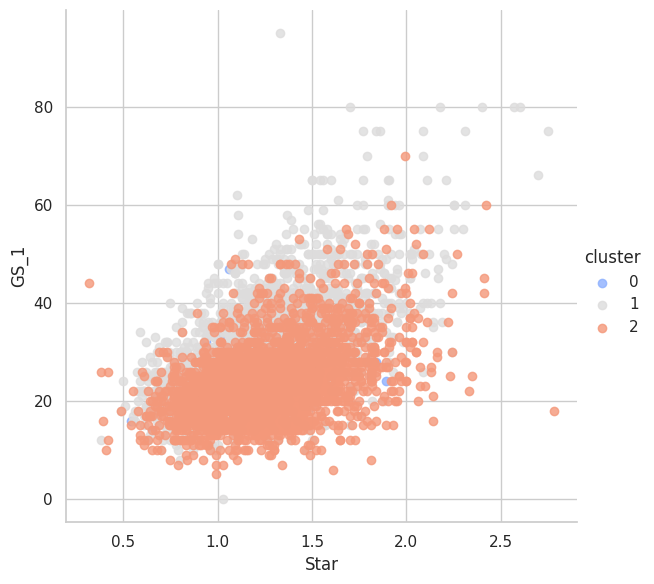

In [ ]:
sns.set_style('whitegrid')
sns.lmplot(x = 'Star',y = 'GS_1', data=df_analyze, hue= 'cluster', palette = 'coolwarm', height = 6, aspect =1, fit_reg = False)